# C-bouton components on rat extensor digitorum longus motoneurons are resistant to chronic functional overload 

### Roger W.P. Kissane1,3┼, Arash Ghaffari-Rafi2┼, Peter G. Tickle3, Samit Chakrabarty3, Stuart Egginton3, Robert M.  Brownstone2* & Calvin C. Smith2*

In [6]:
#importing neccssary packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns; sns.set()
from scipy.stats import shapiro
import researchpy as rp
import matplotlib.ticker
import matplotlib.image as mpimg



In [7]:
from numpy.random import seed
from numpy.random import randn
from scipy.stats import mannwhitneyu
from scipy import stats



 ## Chronic functional overload induces functional shift to slower EDL phenotype 

In [8]:
#### Importing relevant data and wrangling

In [9]:
# Loading the data for muscle histology
Overload_muscle_typehist = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\All_muscle_data_overload\CT_21OV_1.xlsx",sheet_name='type_frq')
Overload_muscle_typehist=Overload_muscle_typehist.dropna() #dropping NaN values



In [10]:
Muscle_raw = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\All_muscle_data_overload\CT_21OV.xlsx", sheet_name='Muscle_all') # new pd dataframe



In [11]:
Muscle_type_medvslat = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\All_muscle_data_overload\CT_21OV_1.xlsx", sheet_name='typefinal') # new pddataframe for the sheet containing the labelled fibres (medial vs lateral)



In [12]:
# adding column to dataframe to specify Control and overload based on animal names.
Muscle_raw.loc[Muscle_raw['Animal'].str.contains('CT'), 'Group'] = 'Control'

Muscle_raw.loc[Muscle_raw['Animal'].str.contains('OV'), 'Group'] = 'Overload'



In [13]:
#renaming columns for processing
Muscle_raw=Muscle_raw.rename(columns={'Twitch (mN)': 'Twitch','Tetanus (mN)': 'Tetanus',
                                                                 'C:F': 'C_F_Ratio', 'relative weight': 'Relative_weight'})



In [14]:
#dropping 0 values. 
Muscle_cap=Muscle_raw.drop(Muscle_raw[Muscle_raw['C_F_Ratio']==0].index)
Muscle_func=Muscle_raw.drop(Muscle_raw[Muscle_raw['Twitch']==0].index)
Muscle_func1=Muscle_raw.drop(Muscle_raw[Muscle_raw['Tetanus']==0].index)


 #### Creating a function to set all Histogram plotting parameters

In [15]:
#Setting Histogram parameters 
def histo_plots_overlay(pl1,pl2,pl3,pl4,Dat,Datsubset,subsetlabel1,subsetlabel2,DV,lab1,lab2,colour1,colour2,edgecol1,edgecol2,LW1,LW2,alpha1,alpha2,YLab,XLab,XLab1,LegLab1,LegLab2,Frameon,ylimL,ylimH):
       pltN=plt.axes([pl1,pl2,pl3,pl4])
       df = Dat[Datsubset == subsetlabel1 ]
       pltN=sns.distplot(df[DV],kde=False, label=lab1, color=colour1,hist_kws=dict(edgecolor=edgecol1, linewidth=LW1,alpha=alpha1))
       df = Dat[Datsubset == subsetlabel2 ]
       pltN=sns.distplot(df[DV],kde=False, label=lab2, color=colour2,hist_kws=dict(edgecolor=edgecol2, linewidth=LW2,alpha=alpha2))
       plt.legend(prop={'size': 13}, )
       plt.ylim((ylimL,ylimH))
       plt.ylabel(YLab)
       pltN.set(xlabel=(XLab))
       pltN.set_xlabel(XLab1)
       pltN.get_legend().set_visible(False)
       sns.despine()


 ####Setting parameters for repetitve 2 condition plots (stripPlots):

In [16]:
def two_cond_stripplot(pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltn=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltn=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltn=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,showfliers=False,showmeans=True, showbox=False,)
    plt.ylim((ylimL,ylimH))
    pltn.set(ylabel=(yLAB))
    pltn.set(xlabel=(XLab))
    pltn.set_xticklabels(labels1)
    sns.despine()
    pltn.invert_xaxis() 
    pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)



In [17]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.2 ,rc={"lines.linewidth": 1.2})
meanpointprops = dict(marker='-', markeredgecolor='r',
                      markerfacecolor='none',markeredgewidth=1,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=1, color='black')

 ### Summary stats for Muscle weight

In [18]:
# muscle weight summary statistics
rp.summary_cont(Muscle_raw.groupby("Group")['Relative_weight'])


,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,7,0.061498,0.005544,0.002095,0.057062,0.065934
Overload,7,0.087788,0.017223,0.006510,0.074006,0.101569


 #### Creating function for shapiro normlaity testing

In [19]:

def Shap_normality(DF,DV,GroupsandDV):
    alpha = 0.05  
    stat, p = shapiro(DF[DV])
    print(GroupsandDV)
    print('Size=%.3f, p=%.3f' % (stat, p))# interpret
    if p > alpha:
        print('normally distributed:use parametric')
    else:
        print('Not normally distributed: use non-parametric')


 #### Creating function for T tests

In [20]:
def T_Test(DF,DF1,Lab1,Lab2,printDV,MNTYPE):
    alpha = 0.05
    stat, p = stats.ttest_ind(DF,DF1)
    print('T test: ' + Lab1 + ' vs ' + Lab2 +  ' for ' + printDV )
    print('Statistics=%.3f, p=%.15f' % (stat, p))
    if p > alpha:
        print(printDV + ' has the same distribution between ' + Lab1 + ' and ' + Lab2 +  ' in ' + MNTYPE  + '(fail to reject H0)')
    else:
        print(printDV + ' has a different distribution between ' + Lab1 + ' and ' + Lab2  + ' in ' + MNTYPE  + '(reject H0)')
#Test=type T for parametric wilcoxon for no parametric
#DF= dataframe1 specifying group1
#DF1=dataframe specifying group2
#Groupin_Var=column for selecting the categorical variable
#Lab1=condition1 and Lab2= condition2
#PrintDV= the dependent variable in question
#MNTYPE=Mn laterality (medial,lateral,entire edl)


 #### Creating function for MannWHitneyU

In [21]:

def ManWhitney(DF,DF1,Lab1,Lab2,printDV,MNTYPE):
    alpha = 0.05
    stat, p = mannwhitneyu(DF,DF1)
    print('Mann WhitneyU: ' + Lab1 + ' vs ' + Lab2 + ' for '+ printDV )
    print('Statistics=%.3f, p=%.15f' % (stat, p))
    if p > alpha:
        print(printDV + ' has same distribution between ' + Lab1 + ' and ' + Lab2 +  ' in ' + MNTYPE  + '(fail to reject H0)')
    else:
        print(printDV + ' has different distribution between ' + Lab1 + ' and ' + Lab2  + ' in ' + MNTYPE  + '(reject H0)')
#Test=type T for parametric wilcoxon for no parametric
#DF= dataframe1 specifying group1
#DF1=dataframe specifying group2
#Groupin_Var=column for selecting the categorical variable
#Lab1=condition1 and Lab2= condition2
#PrintDV= the dependent variable in question
#MNTYPE=Mn laterality (medial,lateral,entire edl)


 ### Testing for differences between control and overload for muscle weight

#### Muscle weight normality testing 

In [22]:
Shap_normality(Muscle_raw,'Relative_weight','Control vs Overload for Relative Weight')



Control vs Overload for Relative Weight
Size=0.872, p=0.044
Not normally distributed: use non-parametric


#### Muscle weight ManWhitneyU

In [23]:
DF=Muscle_raw[Muscle_raw['Group'] == 'Control'].Relative_weight
DF1=Muscle_raw[Muscle_raw['Group'] == 'Overload'].Relative_weight  

ManWhitney(DF,DF1,'Control','Overload','Relative muscle weight','entire muscle')
# compare samples


Mann WhitneyU: Control vs Overload for Relative muscle weight
Statistics=1.000, p=0.001647256938291
Relative muscle weight has different distribution between Control and Overload in entire muscle(reject H0)


In [24]:
rp.summary_cont(Muscle_raw.groupby("Group")['Relative_weight'])

,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,7,0.061498,0.005544,0.002095,0.057062,0.065934
Overload,7,0.087788,0.017223,0.006510,0.074006,0.101569


## Figure 1. Chronic functional overload improves fatigability in EDL muscles

In [25]:
### Importing data for Muscle Physiology-force generation
Twitch_traces=pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\Send_to_Calvin\Final_Figure_Data.xlsx",sheet_name='Twitch_Data')
Tetanus_traces=pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\Send_to_Calvin\Final_Figure_Data.xlsx",sheet_name='Tetanus_Data')


In [26]:
Twitch_traces=Twitch_traces.dropna()  #dropping na/0 values
Twitch_traces_PKnorm=Twitch_traces[(Twitch_traces['norm'] == 'peak')] # adding norm column
Twitch_traces_Massnorm=Twitch_traces[(Twitch_traces['norm'] == 'mass')]
Tetanus_traces=Tetanus_traces.dropna() #dropping na/0 values

In [27]:
Twitch_traces_PKnorm['time_norm']=Twitch_traces_PKnorm['time']*1000 #changing units to milliseconds
Tetanus_traces['time_norm']=Tetanus_traces['time']*1000             #changing units to milliseconds

### Angiogenesis graphs (Figure 1D-J)

In [28]:
Angio_Dat=pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\Send_to_Calvin\Final_Figure_Data.xlsx",sheet_name='Capillary Figure Data') #loading angiogenesis data

### Plotting Figure 1. 

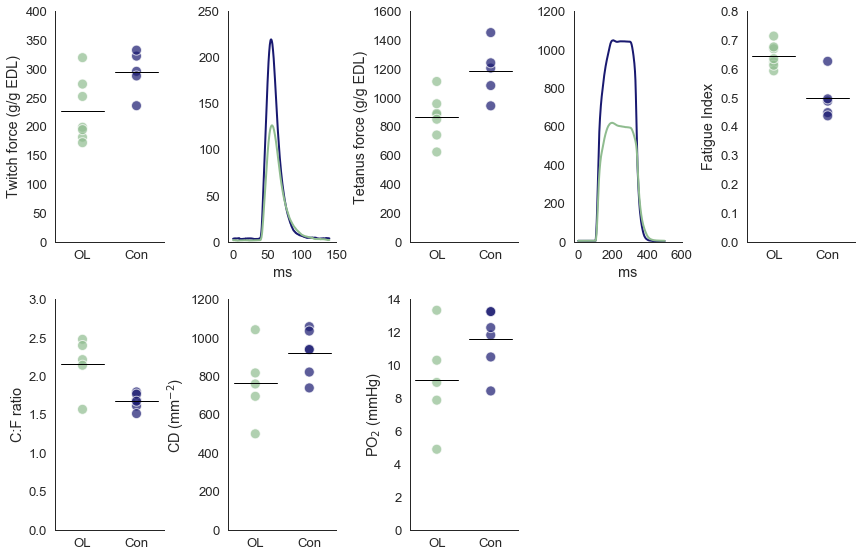

In [29]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5 ,rc={"lines.linewidth": 1.2})
meanpointprops = dict(marker='-', markeredgecolor='r',
                      markerfacecolor='none',markeredgewidth=1,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=1, color='black')

#PLot 1 control vs overload for twitch force
labels1=['Con', 'OL']
two_cond_stripplot(0,0, 0.25, 0.8,"Group","Twitch",10,None,0.7,1,'midnightblue','darkseagreen',Muscle_func1,0,'white',0,400,'Twitch force (g/g EDL)','','',12,1,False)

#Plt1a Twitch trace
plt1a=plt.axes([0.40,0, 0.25, 0.8])
plt1a=sns.lineplot(y='Twitch_Force',x='time_norm', hue= 'group',data=Twitch_traces_PKnorm,legend=False,palette=['midnightblue','darkseagreen'],linewidth=2)
plt.ylim((0,250))
x_ticks = np.arange(0,200,50)
plt1a.set(ylabel=(''))
plt1a.set(xlabel=('ms'))
plt.xticks(x_ticks)

#PLot 2 control vs overload for tetanus force
two_cond_stripplot(0.82,0, 0.25, 0.8,"Group","Tetanus",10,None,0.7,1,'midnightblue','darkseagreen',Muscle_func1,0,'white',0,1600,'Tetanus force (g/g EDL)','','',12,1,False)

#Plt1a Tetatus trace
plt1a=plt.axes([1.2,0, 0.25, 0.8])
plt1a=sns.lineplot(y='Tetanus_force',x='time_norm', hue= 'group',data=Tetanus_traces,legend=False,palette=['midnightblue','darkseagreen'],linewidth=2)
plt.ylim((0,1200))
x_ticks = np.arange(0,620,200)
plt1a.set(ylabel=(''))
plt1a.set(xlabel=('ms'))
plt.xticks(x_ticks)
#PLot 3 control vs overload for fatigue index
two_cond_stripplot(1.6,0, 0.25, 0.8,"Group","FI",10,None,0.7,1,'midnightblue','darkseagreen',Muscle_func1,0,'white',0,0.8,'Fatigue Index','','',12,1,False)

#C:F 
two_cond_stripplot(0,-1, 0.25, 0.8,"group","C_F",10,None,0.7,1,'midnightblue','darkseagreen',Angio_Dat,0,'white',0,3,'C:F ratio','','',12,1,False)
#Cap density
two_cond_stripplot(0.40,-1, 0.25, 0.8,"group","CD",10,None,0.7,1,'midnightblue','darkseagreen',Angio_Dat,0,'white',0,1200,'CD (mm$^{-2}$)','','',12,1,False)
#PO2
two_cond_stripplot(0.82,-1, 0.25, 0.8,"group","PO2",10,None,0.7,1,'midnightblue','darkseagreen',Angio_Dat,0,'white',0,14,'PO$_2$ (mmHg)','','',12,1,False)

plt.savefig(r'C:\Users\csmith\OneDrive - University College London\Overload\Muscle_Func.png', dpi= 300, bbox_inches = 'tight')


 ## Stats for effect of overload on Twitch force, tetanus force and fatigue index (Figure 1 A-C)

In [39]:
print('Twitch force summary stats')

rp.summary_cont(Muscle_func1.groupby("Group")['FI'])


Twitch force summary stats




,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,5,0.498484,0.075448,0.033741,0.424546,0.572423
Overload,7,0.645812,0.042004,0.015876,0.612202,0.679423


 #### Shapiro wilks twitch force control vs overload

In [55]:

#twitch force control vs overload
Shap_normality(Muscle_func,'Twitch','Control vs Overload for twitch force')



Control vs Overload for twitch force
Size=0.916, p=0.190
normally distributed:use parametric


In [40]:
print('Summary stats for Twitch force')

rp.summary_cont(Muscle_func.groupby("Group")['Twitch'])

Summary stats for Twitch force




,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,7,296.002302,36.270311,13.708889,266.980008,325.024595
Overload,7,227.078153,55.276560,20.892576,182.847692,271.308613


### t test for twitch force (Fig 1A)

In [56]:
DF=Muscle_func[Muscle_func['Group'] == 'Control'].Twitch
DF1=Muscle_func[Muscle_func['Group'] == 'Overload'].Twitch                      
T_Test(DF,DF1,'Control','Overload','Twitch force', 'entire EDL')


T test: Control vs Overload for Twitch force
Statistics=2.758, p=0.017336355933783
Twitch force has a different distribution between Control and Overload in entire EDL(reject H0)


### Stats for tetanus force

In [46]:
print('Summary stats for Tetanus force')
rp.summary_cont(Muscle_func1.groupby("Group")['Tetanus'])

Summary stats for Tetanus force




,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,5,1184.213125,189.443581,84.721745,998.558416,1369.867834
Overload,7,864.101786,155.516334,58.779649,739.662802,988.540770


 #### Shapiro wilks tetanic force control vs overload

In [45]:
Shap_normality(Muscle_func1,'Tetanus','Control vs Overload for twitch force')


Control vs Overload for twitch force
Size=0.980, p=0.984
normally distributed:use parametric


In [44]:
###### t test for tetanus force
DF=Muscle_func1[Muscle_func1['Group'] == 'Control'].Tetanus
DF1=Muscle_func1[Muscle_func1['Group'] == 'Overload'].Tetanus                    
T_Test(DF.dropna(),DF1.dropna(),'Control','Overload','Tetanus force', 'entire EDL')

T test: Control vs Overload for Tetanus force
Statistics=3.218, p=0.009210992694549
Tetanus force has a different distribution between Control and Overload in entire EDL(reject H0)


 ### Stats for effect of overload on Fatigue index

In [43]:
Shap_normality(Muscle_raw,'FI','Control vs Overload for twitch force')

Control vs Overload for twitch force
Size=0.943, p=0.464
normally distributed:use parametric


#### t tests for fatigue index

In [42]:
stat, p = stats.ttest_ind(Muscle_raw[Muscle_raw['Group'] == 'Control'].FI,
                          Muscle_raw[Muscle_raw['Group'] == 'Overload'].FI)
                         
DF=Muscle_raw[Muscle_raw['Group'] == 'Control'].FI
DF1=Muscle_raw[Muscle_raw['Group'] == 'Overload'].FI                  
T_Test(DF.dropna(),DF1.dropna(),'Control','Overload','FI', 'entire EDL')

T test: Control vs Overload for FI
Statistics=-4.865, p=0.000388218876889
FI has a different distribution between Control and Overload in entire EDL(reject H0)


In [41]:
print('summary stats for fatigue index')
rp.summary_cont(Muscle_raw.groupby("Group")['FI'])

summary stats for fatigue index




,N,Mean,SD,SE,95% Conf.,Interval
Group,,,,,,
Control,7,0.506237,0.063223,0.023896,0.455648,0.556826
Overload,7,0.645812,0.042004,0.015876,0.612202,0.679423


## Stats for angiogenesis data (Figure1 D-F)

#### Shapiro normality tests for angiogenesis data

In [30]:
#T2 medial vs lateral
Shap_normality(Angio_Dat,'C_F','Control vs Overload for C:F')
Shap_normality(Angio_Dat,'CD','Control vs Overload for CD')
Shap_normality(Angio_Dat,'PO2','Control vs Overload for PO2')

Control vs Overload for C:F
Size=0.873, p=0.084
normally distributed:use parametric
Control vs Overload for CD
Size=0.934, p=0.456
normally distributed:use parametric
Control vs Overload for PO2
Size=0.916, p=0.284
normally distributed:use parametric


#### t-test for angiogenesis data

In [31]:
# t tests for C:F ratio

DF=Angio_Dat[Angio_Dat['group'] == 'control'].C_F
DF1=Angio_Dat[Angio_Dat['group'] == 'overload'].C_F
T_Test(DF,DF1,'control','overload', 'C:F', 'controlvs ol')

T test: control vs overload for C:F
Statistics=-3.200, p=0.010823296599386
C:F has a different distribution between control and overload in controlvs ol(reject H0)


In [32]:
print('C:F ratio summary stats')
rp.summary_cont(Angio_Dat.groupby("group")['C_F'])

C:F ratio summary stats




,N,Mean,SD,SE,95% Conf.,Interval
group,,,,,,
control,6,1.671531,0.103082,0.042083,1.581176,1.761887
overload,5,2.157648,0.358171,0.160179,1.806641,2.508656


In [33]:
#### CD t test

DF=Angio_Dat[Angio_Dat['group'] == 'control'].CD
DF1=Angio_Dat[Angio_Dat['group'] == 'overload'].CD
T_Test(DF,DF1,'control','overload', 'CD', 'controlvs ol')

T test: control vs overload for CD
Statistics=1.647, p=0.133981370753141
CD has the same distribution between control and overload in controlvs ol(fail to reject H0)


In [34]:
print('Capiliary density summary stats')
rp.summary_cont(Angio_Dat.groupby("group")['CD'])

Capiliary density summary stats




,N,Mean,SD,SE,95% Conf.,Interval
group,,,,,,
control,6,920.758613,122.979488,50.206166,812.962339,1028.554887
overload,5,761.262547,196.591629,87.918449,568.602751,953.922344


In [35]:
#### PO2 t tests
DF=Angio_Dat[Angio_Dat['group'] == 'control'].PO2
DF1=Angio_Dat[Angio_Dat['group'] == 'overload'].PO2
T_Test(DF,DF1,'control','overload', 'PO2', 'controlvs ol')

T test: control vs overload for PO2
Statistics=1.672, p=0.128934623835821
PO2 has the same distribution between control and overload in controlvs ol(fail to reject H0)


In [38]:


rp.summary_cont(Angio_Dat.groupby("group")['PO2'])

PO2 density summary stats




,N,Mean,SD,SE,95% Conf.,Interval
group,,,,,,
control,6,11.578374,1.857304,0.758241,9.950376,13.206373
overload,5,9.056003,3.108060,1.389967,6.010104,12.101902


 ## 2. Assessing the size of EDL Mns in the control and overload groups (Figure 2)

 ### Loading Cell SIze data
 this comprises all CTB and FB positive cells from Kv2.1 and SK3 staining
 Cell size was calcualted using cross section ara of a single optical slice through the middle of the cell

In [47]:
Overload_Size2 = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\\Overload_Python_Analysis1\All_CSA_Data_Fast_Blue.xlsx", sheet_name='Sheet1')
#vals_to_replace = {'CONTROL':'Control', 'OVERLOAD':'Overload'}
#Overload_Size3['Condition'] = Overload_Size2['Condition'].map(vals_to_replace)
#Overload_Size3
Overload_Size2=Overload_Size2.drop(Overload_Size2[Overload_Size2['Size']>4000].index) #dropping cells too small to be alphas

 ### Adding 'Group' column for plotting and stats

In [48]:
Overload_Size2.loc[(Overload_Size2.Compartment == 'LATERAL') & (Overload_Size2.Condition == 'Control'), 'Group'] = 'Lateral_Con'  
Overload_Size2.loc[(Overload_Size2.Compartment == 'MEDIAL') & (Overload_Size2.Condition == 'Control'), 'Group'] = 'Medial_Con'  

Overload_Size2.loc[(Overload_Size2.Compartment == 'LATERAL') & (Overload_Size2.Condition == 'Overload'), 'Group'] = 'Lateral_OL'  
Overload_Size2.loc[(Overload_Size2.Compartment == 'MEDIAL') & (Overload_Size2.Condition == 'Overload'), 'Group'] = 'Medial_OL'  


 ### Calculating animal means from all cells

In [49]:
Overload_Size2_grouped=Overload_Size2.groupby(['Animal #', 'Condition','Compartment','Group'],as_index=False).mean()


 ### Creating df by Animal and condition for stats and plotting Control vs OL only

In [50]:
Overload_Size2_grouped1=Overload_Size2.groupby(['Animal #', 'Condition'],as_index=False).mean()



 ### Creating Mn Size figure

[Text(0, 0, 'Con'), Text(0, 0, 'OL')]

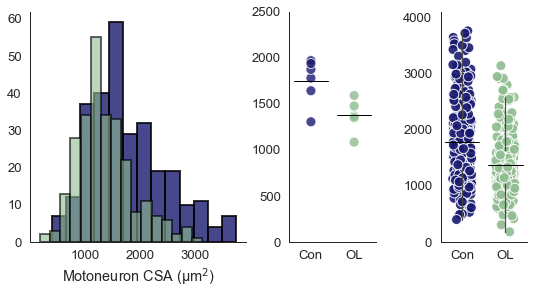

In [62]:
sns.set_style("white")
sns.set_context("paper", font_scale=1.5 ,rc={"lines.linewidth": 1.2})
meanpointprops = dict(marker='-', markeredgecolor='r',
                      markerfacecolor='none',markeredgewidth=1,markersize=8)
medianprops = dict(linestyle='-.', linewidth=0, color='firebrick')
meanlineprops = dict(linestyle='-', linewidth=1, color='black')


plt1 = plt.axes([0,0, 0.5, 0.8])
df = Overload_Size2[Overload_Size2.Condition == 'Control']
plt1=sns.distplot(df['Size'],kde=False, label='Control', color='midnightblue',hist_kws=dict(edgecolor="black", linewidth=2,alpha=0.8))
df = Overload_Size2[Overload_Size2.Condition == 'Overload']
plt1=sns.distplot(df['Size'],kde=False, label='Overload', color='darkseagreen',hist_kws=dict(edgecolor="black", linewidth=2,alpha=0.6))
plt.legend(prop={'size': 13}, )
plt.ylabel('')
plt1.set(xlabel=('Motoneuron CSA (\u03BCm$^2$)'))
plt1.legend('',frameon=False)
sns.despine()

labels1=['OL', 'Con']
#Plt3 COntrol vs overload for MN CSA All EDL MNs
#labels1=['Control', 'Overload']
two_cond_stripplot(0.6,0, 0.2, 0.8,'Condition','Size',10,None,0.8,1,'darkseagreen','midnightblue',Overload_Size2_grouped1,0,'white',0,2500,'','','',12,1,False)

def two_cond_stripplot2(pltM,pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltM=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltM=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=1.75,showcaps=False,showfliers=False,showmeans=True, showbox=False)
    pltM=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    plt.ylim((ylimL,ylimH))
    pltM.set(ylabel=(yLAB))
    pltM.set(xlabel=(XLab))
    pltM.set_xticklabels(labels1)
    pltM.invert_xaxis() 
    sns.despine()
    

# Plt2a Medial vs lateral for MN CSA area -small insert graph on histogram 1 (medial vs lateral MNCSA)
labels1=['Con','OL']


plt2=plt.axes([0.95,0, 0.2, 0.8])
plt2=sns.stripplot(x='Condition', y='Size',s=10,alpha=0.9,linewidth=1, palette=['midnightblue','darkseagreen'],
                   data=Overload_Size2,
                   jitter=0.22, edgecolor='white',zorder=0)
plt2=sns.boxplot(x='Condition', y='Size',data=Overload_Size2, medianprops=medianprops,
                     meanprops=meanlineprops,meanline=True,whis=1.75,showcaps=False,showfliers=False,showmeans=True, showbox=False)
plt.ylim(0,4100)
plt2.set(ylabel=(''))
plt2.set(xlabel='')
labels1=['Con', 'OL']
sns.despine()
plt2.set_xticklabels(labels1)
#pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)

#, (1, 0.5, 'p < 0.001', fontsize=15)


#plt.savefig(r'C:\Users\csmith\OneDrive - University College London\Overload\Mn_size.png', dpi= 300, bbox_inches = 'tight')



 ## Running stats for Cell size

 ### testing normality

In [195]:
Control1 = Overload_Size2[(Overload_Size2['Condition'] == 'Control')]
Control1.reset_index(inplace= True)

Overload1 = Overload_Size2[(Overload_Size2['Condition'] == 'Overload')]
Overload1.reset_index(inplace= True)



 ### Testing Cell size statistical differences between Control and Overload for 1. Medial MNs only, 2. Lateral MNs only and 3.Entire EDL

 ### Performing Shapiro-Wilks normality tests for Control and Overload Cell Size data 

In [64]:
Shap_normality(Overload_Size2_grouped,'Size','Entire EDL Control vs OL')


Entire EDL Control vs OL
Size=0.972, p=0.765
normally distributed:use parametric


 ### Performing T tests, Control vs Overload for Cell Size data in  1. medial only, 2.Lateral only and 3.Entire EDL MN populations

In [65]:
# TTest for cell size Control vs overload overall
alpha = 0.05

#Entire EDL
DF= Overload_Size2_grouped1[(Overload_Size2_grouped1['Condition'] == 'Control')].Size
DF1=Overload_Size2_grouped1[(Overload_Size2_grouped1['Condition'] == 'Overload')].Size
T_Test(DF,DF1,'Control','Overload','Cell size has ','Entire EDL')


T test: Control vs Overload for Cell size has 
Statistics=2.780, p=0.021398473882897
Cell size has  has a different distribution between Control and Overload in Entire EDL(reject H0)


 #### Summary tables for Cell size

In [67]:
print('Summary stats for Motoneuron size')
rp.summary_cont(Overload_Size2_grouped1.groupby("Condition")['Size'])


Summary stats for Motoneuron size




,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
Control,6,1749.421709,248.643286,101.508197,1531.476259,1967.367158
Overload,5,1372.717577,188.119516,84.129605,1188.360452,1557.074702


 ## Overload has no effect on C-bouton innervation of EDL motoneurons

### Figure 3A-A1

 ### Loading C bouton Data

In [69]:
Overload_CBouton2 = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\VAChT Data July27.xlsx", sheet_name='Medial')


#removing cells with extremely low C-bouton count to make sure Gammas are not analyzed

In [138]:
#removing cells with extremely low C-bouton count to make sure Gammas are not analyzed
Overload_CBouton3=Overload_CBouton2.drop(Overload_CBouton2[Overload_CBouton2['VAChT Number']<=1].index)
Overload_CBouton3['Vacht_den']=Overload_CBouton3['VAChT Number/A1']*1000


In [144]:
Overload_CBouton3.drop(Overload_CBouton3[Overload_CBouton3['Vacht_den']<=1].index)

,Condition,Animal #,Cell #,VAChT Area (Average per Cell),VAChT Area (Sum per Cell),Area of Cell (A1),Vacht_pec_cover,VAChT Volume (Average per Cell),VAChT Number,VAChT Number/A1,Compartment,Vacht_den
0,OVERLOAD,Leeds 1,1,29.22,1198.18,7913.350098,15.141248,9.92,41,0.005181,LATERAL,5.181118
1,OVERLOAD,Leeds 1,2,22.39,514.90,5234.149902,9.837319,7.93,23,0.004394,LATERAL,4.394219
2,OVERLOAD,Leeds 1,3,19.44,330.55,9506.080078,3.477248,6.20,17,0.001788,LATERAL,1.788329
3,OVERLOAD,Leeds 1,4,27.95,614.80,5524.939941,11.127723,10.88,22,0.003982,LATERAL,3.981944
4,OVERLOAD,Leeds 1,5,15.30,321.34,7180.660156,4.475076,4.21,21,0.002925,LATERAL,2.924522
...,...,...,...,...,...,...,...,...,...,...,...,...
548,CONTROL,Leeds 21,28,29.10,1513.38,6877.160000,22.005886,10.77,52,0.007561,MEDIAL,7.561261
549,CONTROL,Leeds 21,29,27.82,1363.39,7329.270000,18.601989,10.12,49,0.006686,MEDIAL,6.685523
550,CONTROL,Leeds 21,30,28.35,1616.07,7672.250000,21.063834,10.22,57,0.007429,MEDIAL,7.429372
551,CONTROL,Leeds 21,31,27.53,1981.85,9397.580000,21.088940,10.30,72,0.007662,LATERAL,7.661547


 ### Adding extra labels to C bouton DF to group compartment and condition

 #### Producing graph of animal means by Animal and condition for Control vs OL for entire EDL

In [84]:
Overload_CBouton3

,Condition,Animal #,Cell #,VAChT Area (Average per Cell),VAChT Area (Sum per Cell),Area of Cell (A1),Vacht_pec_cover,VAChT Volume (Average per Cell),VAChT Number,VAChT Number/A1,Compartment,Vacht_den
0,OVERLOAD,Leeds 1,1,29.22,1198.18,7913.350098,15.141248,9.92,41,0.005181,LATERAL,5.181118
1,OVERLOAD,Leeds 1,2,22.39,514.90,5234.149902,9.837319,7.93,23,0.004394,LATERAL,4.394219
2,OVERLOAD,Leeds 1,3,19.44,330.55,9506.080078,3.477248,6.20,17,0.001788,LATERAL,1.788329
3,OVERLOAD,Leeds 1,4,27.95,614.80,5524.939941,11.127723,10.88,22,0.003982,LATERAL,3.981944
4,OVERLOAD,Leeds 1,5,15.30,321.34,7180.660156,4.475076,4.21,21,0.002925,LATERAL,2.924522
...,...,...,...,...,...,...,...,...,...,...,...,...
548,CONTROL,Leeds 21,28,29.10,1513.38,6877.160000,22.005886,10.77,52,0.007561,MEDIAL,7.561261
549,CONTROL,Leeds 21,29,27.82,1363.39,7329.270000,18.601989,10.12,49,0.006686,MEDIAL,6.685523
550,CONTROL,Leeds 21,30,28.35,1616.07,7672.250000,21.063834,10.22,57,0.007429,MEDIAL,7.429372
551,CONTROL,Leeds 21,31,27.53,1981.85,9397.580000,21.088940,10.30,72,0.007662,LATERAL,7.661547


In [139]:
OL_Cbouton_grouped2=Overload_CBouton3.groupby(['Animal #', 'Condition'],as_index=False).mean()



In [133]:
#renaming columns for easier plotting 

Overload_CBouton3_grouped=Overload_CBouton3_grouped.rename(columns={'VAChT Area (Average per Cell)': 'VACHT_Area', 'VAChT Number/A1': 'Vacht_density', 'VAChT Number':'VAChT_Number'})
Overload_CBouton3_grouped['area_100'] = Overload_CBouton3_grouped['VACHT_Area']*100 # changing units to density/100 microns



In [140]:
Overload_CBouton3_grouped['density_100'] = Overload_CBouton3_grouped['Vacht_density']*1000



In [141]:
OL_Cbouton_grouped2=OL_Cbouton_grouped2.rename(columns={'VAChT Area (Average per Cell)': 'VACHT_Area', 'VAChT Number/A1': 'Vacht_density','VAChT Number':'VAChT_Number'})
OL_Cbouton_grouped2['area_100'] = OL_Cbouton_grouped2['VACHT_Area']*100



In [142]:
OL_Cbouton_grouped2['density_100'] = OL_Cbouton_grouped2['Vacht_density']*1000



 ### Creating the C bouton figure

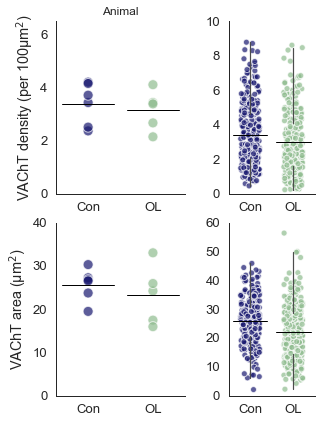

In [145]:
#DENSITY C BOUTON
def two_cond_stripplot1(pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltn=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltn=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltn=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,showfliers=False,showmeans=True, showbox=False,)
    plt.ylim((ylimL,ylimH))
    pltn.set(ylabel=(yLAB))
    pltn.set(xlabel=(XLab))
    pltn.set_xticklabels(labels1)
    pltn.invert_xaxis() 
    sns.despine()
    #pltn.set_xticklabels(labels1)
    pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)

#Entire EDL
labels1=['OL','Con']

two_cond_stripplot1(0.6,0, 0.3, 0.6,'Condition','density_100',10,None,0.7,1,'darkseagreen','midnightblue',OL_Cbouton_grouped2,0,"White",0,6.5,'VAChT density (per 100\u03BCm$^2$)','','Animal',12,1,False)

#two_cond_stripplot2(1,0, 0.3, 0.6,'Condition','Vacht_den',6,None,0.7,1,'darkseagreen','midnightblue',Overload_CBouton3,0.22,"White",0,10,'','','Motoneurons',12,1,False)
plt1=plt.axes([1,0, 0.2, 0.6])
plt1=sns.stripplot(x='Condition', y='Vacht_den',s=6,alpha=0.7,linewidth=1, palette=['darkseagreen','midnightblue'],
                   data=Overload_CBouton3,
                   jitter=0.22, edgecolor='white',zorder=0)
plt1=sns.boxplot(x='Condition', y='Vacht_den',data=Overload_CBouton3, medianprops=medianprops,
                     meanprops=meanlineprops,meanline=True,whis=1.75,showcaps=False,showfliers=False,showmeans=True, showbox=False)
plt.ylim(0,10)
plt1.set(ylabel=(''))
plt1.set(xlabel='')
labels1=['OL', 'Con']
sns.despine()
plt1.set_xticklabels(labels1)
plt1.invert_xaxis() 
#pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)

#########################################################################################

labels1=['OL','Con']
#Entire EDL
two_cond_stripplot1(0.6,-0.7, 0.3, 0.6,'Condition','VACHT_Area',10,None,0.7,1,'darkseagreen','midnightblue',OL_Cbouton_grouped2,0,"White",0,40,'VAChT area (\u03BCm$^2$)','','',12,1,False)


#Entire EDL
#DENSITY C BOUTON
plt2=plt.axes([1,-0.7, 0.2, 0.6])
plt2=sns.stripplot(x='Condition', y='VAChT Area (Average per Cell)',s=6,alpha=0.7,linewidth=1, palette=['darkseagreen','midnightblue'],
                   data=Overload_CBouton3,
                   jitter=0.22, edgecolor='white',zorder=0)
plt2=sns.boxplot(x='Condition', y='VAChT Area (Average per Cell)',data=Overload_CBouton3, medianprops=medianprops,
                     meanprops=meanlineprops,meanline=True,whis=1.75,showcaps=False,showfliers=False,showmeans=True, showbox=False)
plt.ylim(0,60)
plt2.set(ylabel=(''))
plt2.set(xlabel='')
labels1=['OL', 'Con']
sns.despine()
plt2.set_xticklabels(labels1)
plt2.invert_xaxis() 
#pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)



In [103]:
OL_Cbouton_grouped2.head()

,Animal #,Condition,VACHT_Area,VAChT Area (Sum per Cell),Area of Cell (A1),Vacht_pec_cover,VAChT Volume (Average per Cell),VAChT Number,Vacht_density,Vacht_den,area_100,density_100
0,Leeds 1,OVERLOAD,24.212097,637.866452,7869.611811,8.695607,7.685161,25.129032,0.003437,3.437493,2421.209677,3.437493
1,Leeds 11,OVERLOAD,25.922909,545.567636,6521.843868,8.653905,7.951636,21.454545,0.003385,3.384854,2592.290909,3.384854
2,Leeds 12,OVERLOAD,33.032963,971.610370,7874.906656,13.403518,12.010370,30.629630,0.004109,4.108530,3303.296296,4.108530
3,Leeds 15,CONTROL,27.252941,999.048824,11408.605319,9.739292,9.157059,35.705882,0.003435,3.434672,2725.294118,3.434672
4,Leeds 16,CONTROL,19.470233,340.382326,7320.099082,4.620893,4.774419,17.279070,0.002369,2.369090,1947.023256,2.369090


 ## STATS: C bouton

 #### Shapiro wilks normality tests

In [124]:
Shap_normality(OL_Cbouton_grouped2,'density_100','control only medial vs lateral')  
Shap_normality(OL_Cbouton_grouped2,'VACHT_Area','control only medial vs lateral')  


control only medial vs lateral
Size=0.906, p=0.217
normally distributed:use parametric
control only medial vs lateral
Size=0.956, p=0.720
normally distributed:use parametric


 #### T tests for Vacht density

In [215]:
df=OL_Cbouton_grouped2[OL_Cbouton_grouped2['Condition'] == 'OVERLOAD'].density_100
df1=OL_Cbouton_grouped2[OL_Cbouton_grouped2['Condition'] == 'CONTROL'].density_100

T_Test(df,df1,'control','overload','vacht density has ', ' MNs-con and OL ')


T test: control vs overload for vacht density has 
Statistics=-0.525, p=0.612267910268901
vacht density has  has the same distribution between control and overload in  MNs-con and OL (fail to reject H0)


#### Summary Stats for C bouton Density

In [190]:
rp.summary_cont(OL_Cbouton_grouped2.groupby("Condition")['density_100'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,3.397532,0.795830,0.324896,2.699957,4.095108
OVERLOAD,5,3.149996,0.756627,0.338374,2.408502,3.891491


#### Summary stats for Vacht area

In [221]:
df=OL_Cbouton_grouped2[OL_Cbouton_grouped2['Condition'] == 'OVERLOAD'].VACHT_Area
df1=OL_Cbouton_grouped2[OL_Cbouton_grouped2['Condition'] == 'CONTROL'].VACHT_Area

T_Test(df,df1,'control','overload','vacht area has ', ' MNs-con and OL ')


T test: control vs overload for vacht area has 
Statistics=-0.730, p=0.483892767448891
vacht area has  has the same distribution between control and overload in  MNs-con and OL (fail to reject H0)


In [222]:
rp.summary_cont(OL_Cbouton_grouped2.groupby("Condition")['VACHT_Area'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,25.681540,3.693173,1.507732,22.444331,28.918749
OVERLOAD,5,23.308978,6.910120,3.090299,16.537061,30.080896


 # Kv2.1 data analyses

In [146]:
KV2 = pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\\Overload_Python_Analysis1\Kv2.1 Data.xlsx", sheet_name='Compartment')



In [147]:
KV2.head()


,Condition,Animal_no,Cell_no,Kv2.1 Total Area (Average per Cell),Kv2.1 Total Volume (Average per Cell),Kv2density,Kv2.1 Co Number/Kv2.1 Total Number,Compartment,Unnamed: 8,Unnamed: 9,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,OVERLOAD,Leeds 1,1,1.82,0.18,0.457107,61.538462,MEDIAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,OVERLOAD,Leeds 1,2,1.79,0.17,0.029360,66.666667,MEDIAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,OVERLOAD,Leeds 1,3,1.80,0.20,0.422020,96.296296,LATERAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0
3,OVERLOAD,Leeds 1,4,1.22,0.13,2.628583,48.125000,LATERAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,OVERLOAD,Leeds 1,5,1.59,0.15,0.221792,5.000000,MEDIAL,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [148]:
KV2_clean=KV2.drop(KV2[KV2['Kv2density']<=0.1].index) # dropping cells with extremely low density(likely to be gamma MNs)
KV2_clean1=KV2_clean.drop(KV2_clean[KV2_clean['Kv2.1 Co Number/Kv2.1 Total Number']<=1].index) # dropping cells with no colocalisation between Kv2.1 and vacht)
KV2_clean3=KV2_clean.rename(columns={'Kv2density': 'KV2_density', 'Kv2.1 Total Area (Average per Cell)': 'KV2_Area', 'Kv2.1 Co Number/Kv2.1 Total Number': 'KV2_coloc' })

 #### cells lying outside of whiskers (3 sd from the mean) were re-assessed for abnormal staining/ quality
 The following cells were identified as low quality and removed by the code in the cell below. 
 Animal 24, cell 17
 Animal 20, cell 17
 Animal 11, cells 5 and 12 



In [149]:
KV2clean4=KV2_clean3.drop(KV2_clean3[(KV2_clean3['Animal_no'] == 'Leeds 16') & (KV2_clean3['Cell_no'] == 17)].index)
KV2clean4=KV2clean4.drop(KV2clean4[(KV2clean4['Animal_no'] == 'Leeds 20') & (KV2clean4['Cell_no'] == 17)].index)    #dropping cell 17 from Leeds 20
KV2clean4=KV2clean4.drop(KV2clean4[(KV2clean4['Animal_no'] == 'Leeds 11') & (KV2clean4['Cell_no'] == 5)].index)     #dropping cell 5 from Leeds 11
KV2clean4=KV2clean4.drop(KV2clean4[(KV2clean4['Animal_no'] == 'Leeds 11') & (KV2clean4['Cell_no'] == 12)].index)    #dropping cell 12 from Leeds 11


#### Grouping cells by animal and condition for plotting and stats.

In [150]:
kv2clean_grouped=KV2clean4.groupby(['Animal_no', 'Condition'],as_index=False).mean()


In [151]:
kv2clean_grouped


,Animal_no,Condition,KV2_Area,Kv2.1 Total Volume (Average per Cell),KV2_density,KV2_coloc,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,Leeds 1,OVERLOAD,2.087083,0.255000,1.913674,27.699193,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0
1,Leeds 11,OVERLOAD,3.389000,0.526000,2.792943,29.297369,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Leeds 12,OVERLOAD,3.867333,0.646667,4.364962,12.651382,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Leeds 15,CONTROL,3.483077,0.607692,3.458583,17.694624,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Leeds 16,CONTROL,2.425000,0.275000,3.504322,9.318811,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Leeds 17,CONTROL,3.188462,0.481923,3.136636,22.353694,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,Leeds 18,CONTROL,3.028929,0.476429,6.213035,6.125804,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Leeds 2,OVERLOAD,3.258824,0.431765,1.412688,30.995883,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,Leeds 20,CONTROL,2.849643,0.455714,4.188599,15.192060,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Leeds 21,CONTROL,2.951923,0.872692,4.329718,28.213164,NaN,NaN,NaN,3.655356,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Importing macro and micro cluster data

In [152]:

df_KV2atCbouton_OL= pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\Kv2.1_Mac_vs_mic_cluster_OVERLOAD_Maccroonly.xlsx", sheet_name='all')
df_KV2atCbouton_control=pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\Kv2.1_Mac_vs_mic_cluster_control_Maccroonly.xlsx", sheet_name='all')


In [153]:
df_KV2awayfromCbouton_Control= pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\Kv2.1_Mac_vs_mic_cluster_control_MICroonly.xlsx", sheet_name='all')

df_KV2awayfromCbouton_OL=pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\Kv2.1_Mac_vs_mic_cluster_OVERLOAD_MICcroonly.xlsx", sheet_name='all')


away    19291
Name: location, dtype: int64

In [154]:
#ccreating joint DF with all micro cluster data for both control and overload conditions
framesCbout=[df_KV2atCbouton_OL,df_KV2atCbouton_control]
All_Cbout=pd.concat(framesCbout)

#All_Macro=All_Macro.drop(All_Macro[All_Macro['Surface_area']< 11].index)

All_Cbout=All_Cbout.dropna()


In [155]:
All_Cbout

,Condition,Compartment,Animal,Cell,Surface_area,Cell_area,location
0,OVERLOAD,MEDIAL,Leeds 1,1,1.453600,11375.900391,at
1,OVERLOAD,MEDIAL,Leeds 1,1,1.258870,11375.900391,at
2,OVERLOAD,MEDIAL,Leeds 1,1,0.852119,11375.900391,at
3,OVERLOAD,MEDIAL,Leeds 1,1,1.360660,11375.900391,at
4,OVERLOAD,MEDIAL,Leeds 1,1,1.384470,11375.900391,at
...,...,...,...,...,...,...,...
4782,CONTROL,MEDIAL,Leeds 21,32,13.547200,6894.570000,at
4783,CONTROL,MEDIAL,Leeds 21,32,12.324100,6894.570000,at
4784,CONTROL,MEDIAL,Leeds 21,32,32.055599,6894.570000,at
4785,CONTROL,MEDIAL,Leeds 21,32,19.648399,6894.570000,at


In [156]:
#ccreating joint DF with all micro cluster data for both control and overload conditions
frames=[df_KV2awayfromCbouton_OL,df_KV2awayfromCbouton_Control]
All_away=pd.concat(frames)

#All_Micro=All_Micro.drop(All_Micro[All_Micro['Surface_area']> 11].index)


In [157]:
frames=[All_away,All_Cbout]
All_All=pd.concat(frames)
All_All=All_All.dropna()


In [158]:
#All_All.iloc[All_All.Surface_area <= 11, 'Size'] = 'micro' 
#All_All.iloc[All_All.Surface_area >= 11, 'Size'] = 'macro'
conditions= [(All_All['Surface_area'] < 6), (All_All['Surface_area'] > 6)]
labels=['micro','macro']
All_All['Size'] = np.select(conditions, labels)

In [159]:
All_All=All_All.drop(All_All[(All_All['Animal'] == 'Leeds 16') & (All_All['Cell'] == 17)].index)
All_All=All_All.drop(All_All[(All_All['Animal'] == 'Leeds 20') & (All_All['Cell'] == 17)].index)    #dropping cell 17 from Leeds 20
All_All=All_All.drop(All_All[(All_All['Animal'] == 'Leeds 11') & (All_All['Cell'] == 5)].index)     #dropping cell 5 from Leeds 11
                                                                                                 #dropping cell 12 from Leeds 11
#cells dropped fro poor image quality

In [160]:
All_All

,Condition,Compartment,Animal,Cell,Surface_area,Cell_area,location,Size
0,OVERLOAD,MEDIAL,Leeds 1,1,1.463190,11375.900391,away,micro
1,OVERLOAD,MEDIAL,Leeds 1,1,0.471131,11375.900391,away,micro
2,OVERLOAD,MEDIAL,Leeds 1,1,1.548640,11375.900391,away,micro
3,OVERLOAD,MEDIAL,Leeds 1,1,1.406140,11375.900391,away,micro
4,OVERLOAD,MEDIAL,Leeds 1,1,0.699855,11375.900391,away,micro
...,...,...,...,...,...,...,...,...
4782,CONTROL,MEDIAL,Leeds 21,32,13.547200,6894.570000,at,macro
4783,CONTROL,MEDIAL,Leeds 21,32,12.324100,6894.570000,at,macro
4784,CONTROL,MEDIAL,Leeds 21,32,32.055599,6894.570000,at,macro
4785,CONTROL,MEDIAL,Leeds 21,32,19.648399,6894.570000,at,macro


In [161]:
all_density=All_All.groupby(['Condition', 'Animal','Cell','location'],as_index=False).count()


In [162]:
all_density

,Condition,Animal,Cell,location,Compartment,Surface_area,Cell_area,Size
0,CONTROL,Leeds 15,1,at,43,43,43,43
1,CONTROL,Leeds 15,1,away,784,784,784,784
2,CONTROL,Leeds 15,2,at,17,17,17,17
3,CONTROL,Leeds 15,2,away,522,522,522,522
4,CONTROL,Leeds 15,3,at,47,47,47,47
...,...,...,...,...,...,...,...,...
465,OVERLOAD,Leeds 3,11b,away,6,6,6,6
466,OVERLOAD,Leeds 3,12a,at,6,6,6,6
467,OVERLOAD,Leeds 3,12a,away,16,16,16,16
468,OVERLOAD,Leeds 3,12b,at,11,11,11,11


In [163]:
all_area=All_All.groupby(['Condition', 'Animal','Cell','location' ],as_index=False).mean()

In [164]:
all_area

,Condition,Animal,Cell,location,Surface_area,Cell_area
0,CONTROL,Leeds 15,1,at,18.613191,10399.400391
1,CONTROL,Leeds 15,1,away,2.743601,10399.400391
2,CONTROL,Leeds 15,2,at,27.280785,11806.300000
3,CONTROL,Leeds 15,2,away,3.048265,11806.300000
4,CONTROL,Leeds 15,3,at,29.003936,10776.100000
...,...,...,...,...,...,...
465,OVERLOAD,Leeds 3,11b,away,1.514976,2871.250000
466,OVERLOAD,Leeds 3,12a,at,5.598294,5308.620000
467,OVERLOAD,Leeds 3,12a,away,3.681940,5308.620000
468,OVERLOAD,Leeds 3,12b,at,3.283914,6130.390137


In [165]:
Kv_count_col=all_density['Size']
DF_kv_density=pd.concat([all_area,Kv_count_col], axis=1)
DF_kv_density['density']=(DF_kv_density['Size'] / DF_kv_density['Cell_area']) *100 
DF_kv_density=DF_kv_density.drop(DF_kv_density[DF_kv_density['density']<=0.1].index)
DF_kv_density=DF_kv_density.drop(DF_kv_density[DF_kv_density['density']>15].index) #outside 3stdv from mean

In [166]:
DF_kv_density_grouped=DF_kv_density.groupby(['Animal','Condition','Size', 'location'],as_index=False).mean()

In [167]:
DF_kv_density_grouped

,Animal,Condition,Size,location,Surface_area,Cell_area,density
0,Leeds 1,OVERLOAD,7,at,2.736438,6231.359863,0.112335
1,Leeds 1,OVERLOAD,8,at,13.524269,3089.649902,0.258929
2,Leeds 1,OVERLOAD,9,at,5.773178,3355.830078,0.268190
3,Leeds 1,OVERLOAD,10,at,14.232633,9017.440430,0.110896
4,Leeds 1,OVERLOAD,11,away,2.052911,6231.359863,0.176526
...,...,...,...,...,...,...,...
383,Leeds 3,OVERLOAD,30,away,3.220762,6130.390137,0.489365
384,Leeds 3,OVERLOAD,43,away,2.016024,6133.150000,0.701108
385,Leeds 3,OVERLOAD,44,away,2.598636,4324.810059,1.017386
386,Leeds 3,OVERLOAD,47,away,5.722917,7637.930176,0.615350


In [168]:
# separating data frames into C-bouton associated and C-bouton non-associated.
DF_kv_density_CBOUT_grouped=DF_kv_density_grouped.drop(DF_kv_density_grouped[DF_kv_density_grouped['location']=='away'].index)
DF_kv_density_CBOUT_grouped1=DF_kv_density_CBOUT_grouped.groupby(['Condition', 'Animal'],as_index=False).mean()

DF_kv_density_NON_CBOUT_grouped=DF_kv_density_grouped.drop(DF_kv_density_grouped[DF_kv_density_grouped['location']=='at'].index)
DF_kv_density_NON_CBOUT_grouped1=DF_kv_density_NON_CBOUT_grouped.groupby(['Condition', 'Animal'],as_index=False).mean()

In [169]:
DF_kv_density_NON_CBOUT_grouped1

,Condition,Animal,Size,Surface_area,Cell_area,density
0,CONTROL,Leeds 15,358.923077,3.459381,10329.807647,3.384654
1,CONTROL,Leeds 16,256.647059,2.409220,6780.264690,3.991472
2,CONTROL,Leeds 17,273.750000,3.176247,8008.500278,3.239433
3,CONTROL,Leeds 18,529.678571,3.029229,8720.167548,6.213206
4,CONTROL,Leeds 20,356.785714,2.849397,9071.055336,4.188599
5,CONTROL,Leeds 21,330.240000,2.973027,7920.232412,3.980278
6,OVERLOAD,Leeds 1,116.166667,2.066040,7843.293809,1.832884
7,OVERLOAD,Leeds 11,442.000000,3.119720,7584.859562,6.324806
8,OVERLOAD,Leeds 12,376.529412,3.687377,7842.648199,4.353584
9,OVERLOAD,Leeds 2,86.812500,3.089873,6212.597186,1.448531


In [170]:
all_area_NONCBOUT=all_area.drop(all_area[all_area['location']=='at'].index)
all_area_NONCBOUT_grouped=all_area_NONCBOUT.groupby(['Condition', 'Animal'],as_index=False).mean()
all_area_CBOUT=all_area.drop(all_area[all_area['location']=='away'].index)
all_area_CBOUT_grouped=all_area_CBOUT.groupby(['Condition', 'Animal'],as_index=False).mean()


In [171]:
all_area_NONCBOUT_grouped

,Condition,Animal,Surface_area,Cell_area
0,CONTROL,Leeds 15,3.459381,10329.807647
1,CONTROL,Leeds 16,2.366979,6701.087204
2,CONTROL,Leeds 17,3.171567,8233.418206
3,CONTROL,Leeds 18,3.029229,8720.167548
4,CONTROL,Leeds 20,2.849397,9071.055336
5,CONTROL,Leeds 21,2.952252,8011.919627
6,OVERLOAD,Leeds 1,1.990433,8254.472960
7,OVERLOAD,Leeds 11,3.312102,7558.256395
8,OVERLOAD,Leeds 12,3.687377,7842.648199
9,OVERLOAD,Leeds 2,3.006176,6583.118423


In [172]:
DF_kv_density_NON_CBOUT_grouped

,Animal,Condition,Size,location,Surface_area,Cell_area,density
4,Leeds 1,OVERLOAD,11,away,2.052911,6231.359863,0.176526
8,Leeds 1,OVERLOAD,20,away,1.593189,9017.440430,0.221792
14,Leeds 1,OVERLOAD,29,away,2.315338,7754.930176,0.373956
17,Leeds 1,OVERLOAD,34,away,1.974056,5068.950195,0.670750
21,Leeds 1,OVERLOAD,48,away,1.773919,8839.400391,0.543023
...,...,...,...,...,...,...,...
383,Leeds 3,OVERLOAD,30,away,3.220762,6130.390137,0.489365
384,Leeds 3,OVERLOAD,43,away,2.016024,6133.150000,0.701108
385,Leeds 3,OVERLOAD,44,away,2.598636,4324.810059,1.017386
386,Leeds 3,OVERLOAD,47,away,5.722917,7637.930176,0.615350


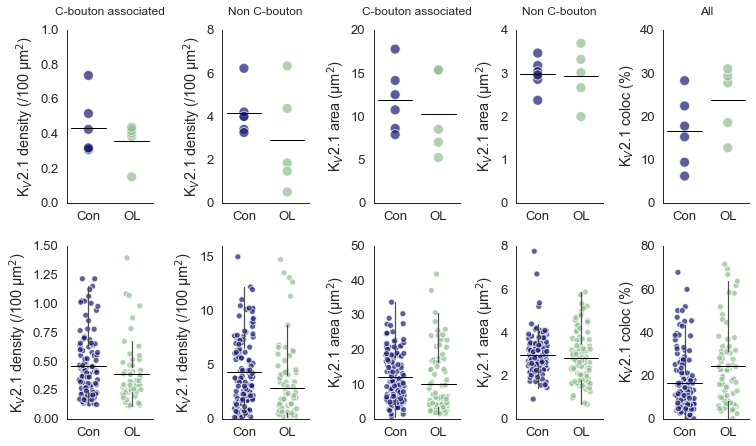

In [173]:
# all Density
labels1=['Con','OL']
def two_cond_stripplot1(pltn,pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltn=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltn=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltn=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,showfliers=False,showmeans=True, showbox=False)
    plt.ylim((ylimL,ylimH))
    pltn.set(ylabel=(yLAB))
    pltn.set(xlabel=(XLab))
    pltn.set_xticklabels(labels1)
    #pltn.invert_xaxis() 
    pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)
    sns.despine()
two_cond_stripplot1(1,0,0, 0.2, 0.6,'Condition','density',10,None,0.7,1,'midnightblue','darkseagreen',DF_kv_density_CBOUT_grouped1,0,'white',0,1,'K$_V$2.1 density (/100 \u03BCm$^2$)','','C-bouton associated',12,1.05,False)

two_cond_stripplot1(1,0.36,0, 0.2, 0.6,'Condition','density',10,None,0.7,1,'midnightblue','darkseagreen',DF_kv_density_NON_CBOUT_grouped1,0,'white',0,8,'K$_V$2.1 density (/100 \u03BCm$^2$)','','Non C-bouton',12,1.05,False)

labels1=['Con','OL']
def two_cond_stripplot2(pltM,pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltM=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltM=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltM=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=1.5,showcaps=False,showfliers=False,showmeans=True, showbox=False)
    plt.ylim((ylimL,ylimH))
    pltM.set(ylabel=(yLAB))
    pltM.set(xlabel=(XLab))
    pltM.set_xticklabels(labels1)
    pltM.set_title(Title,fontsize=Ttsize,y=Ttpos)
    sns.despine()
    pltM.invert_xaxis() 





labels1=['Con','OL']
def two_cond_stripplot2(pltM,pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltM=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltM=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltM=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=1.5,showcaps=False,showfliers=False,showmeans=True, showbox=False)
    plt.ylim((ylimL,ylimH))
    pltM.set(ylabel=(yLAB))
    pltM.set(xlabel=(XLab))
    pltM.set_xticklabels(labels1)
    pltM.set_title(Title,fontsize=Ttsize,y=Ttpos)
    sns.despine()
    #pltM.invert_xaxis() 

##
labels1=['Con','OL']
two_cond_stripplot1(1,0.71,0, 0.2, 0.6,'Condition','Surface_area',10,None,0.7,1,'midnightblue','darkseagreen',all_area_CBOUT_grouped,0,'white',0,20,'K$_V$2.1 area (\u03BCm$^2$)','','C-bouton associated',12,1.05,False)

two_cond_stripplot1(1,1.04,0, 0.2, 0.6,'Condition','Surface_area',10,None,0.7,1,'midnightblue','darkseagreen',all_area_NONCBOUT_grouped,0,'white',0,4,'K$_V$2.1 area (\u03BCm$^2$)','','Non C-bouton',12,1.05,False)




two_cond_stripplot2(1,1.04,-0.75, 0.2, 0.6,'Condition','Surface_area',6,None,0.7,1,'midnightblue','darkseagreen',all_area_NONCBOUT,0.22,'white',0,8,'K$_V$2.1 area (\u03BCm$^2$)','','',12,1,False)

two_cond_stripplot2(1,0.71,-0.75, 0.2, 0.6,'Condition','Surface_area',6,None,0.7,1,'midnightblue','darkseagreen',all_area_CBOUT,0.22,'white',0,50,'K$_V$2.1 area (\u03BCm$^2$)','','',12,1,False)



labels1=['OL','Con']
def two_cond_stripplot2(pltM,pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltM=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltM=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltM=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=1.5,showcaps=False,showfliers=False,showmeans=True, showbox=False)
    plt.ylim((ylimL,ylimH))
    pltM.set(ylabel=(yLAB))
    pltM.set(xlabel=(XLab))
    pltM.set_xticklabels(labels1)
    pltM.set_title(Title,fontsize=Ttsize,y=Ttpos)
    sns.despine()
    pltM.invert_xaxis() 

labels1=['OL','Con']
two_cond_stripplot2(1,0,-0.75, 0.2, 0.6,'Condition','density',6,None,0.7,1,'darkseagreen','midnightblue',DF_kv_density_CBOUT_grouped,0.22,'white',0,1.5,'K$_V$2.1 density (/100 \u03BCm$^2$)','','',12,1,False)
two_cond_stripplot2(1,0.36,-0.75, 0.2, 0.6,'Condition','density',6,None,0.7,1,'darkseagreen','midnightblue',DF_kv_density_NON_CBOUT_grouped,0.22,'white',0,16,'K$_V$2.1 density (/100 \u03BCm$^2$)','','',12,1,False)

labels1=['OL','Con']
two_cond_stripplot2(1,1.38,-0.75, 0.2, 0.6,'Condition','KV2_coloc',6,None,0.7,1,'darkseagreen','midnightblue',KV2clean4,0.22,'white',0,80,'K$_V$2.1 coloc (%)','','',12,1,False)

def two_cond_stripplot1(pltn,pltnXpos,pltnYpos,pltnXsize,pltnYsize,x,y,s,hue,alpha,linewidth,pal1,pal2,Dat,jit,edgeC,ylimL,ylimH,yLAB,XLab,Title,Ttsize,Ttpos,dodge):
    pltn=plt.axes([pltnXpos,pltnYpos, pltnXsize, pltnYsize])
    pltn=sns.stripplot(x=x, y=y,s=s,alpha=alpha,hue=hue,linewidth=linewidth, palette=[pal1,pal2],
                   data=Dat,
                   jitter=jit, edgecolor=edgeC,dodge=dodge,zorder=0)
    pltn=sns.boxplot(x=x, y=y,data=Dat, medianprops=medianprops,hue=hue,
                     meanprops=meanlineprops,meanline=True,whis=False,showcaps=False,showfliers=False,showmeans=True, showbox=False)
    plt.ylim((ylimL,ylimH))
    pltn.set(ylabel=(yLAB))
    pltn.set(xlabel=(XLab))
    pltn.set_xticklabels(labels1)
    pltn.invert_xaxis() 
    pltn.set_title(Title,fontsize=Ttsize,y=Ttpos)
    sns.despine()

labels1=['OL','Con']

two_cond_stripplot1(1,1.38,0, 0.2, 0.6,'Condition','KV2_coloc',10,None,0.7,1,'darkseagreen','midnightblue',kv2clean_grouped,0,'white',0,40,'K$_V$2.1 coloc (%)','','All',12,1.05,False)

plt.savefig(r'C:\Users\csmith\OneDrive - University College London\Overload\KV_Fig_Jan_2020.png', dpi= 300, bbox_inches = 'tight')



 ### Kv2.1 density Stats: Whole EDL Control vs Overload

 #### Testing normality for Kv2.1 density and area in control vs overload

In [174]:
Shap_normality(DF_kv_density_CBOUT_grouped1,'density','Control vs OL for Kv2 macro-cluster density')       # testing normality for Area
#Shap_normality(Macro_grouped_ALL,'Surface_Area_at_C_Bouton','Control vs OL for Kv2 density')       # testing normality for Area

Control vs OL for Kv2 macro-cluster density
Size=0.916, p=0.289
normally distributed:use parametric


In [175]:
#Kv2.1 density T test
DF=DF_kv_density_CBOUT_grouped1.drop(DF_kv_density_CBOUT_grouped1[DF_kv_density_CBOUT_grouped1['Condition']=='OVERLOAD'].index)
DF1=DF_kv_density_CBOUT_grouped1.drop(DF_kv_density_CBOUT_grouped1[DF_kv_density_CBOUT_grouped1['Condition']=='CONTROL'].index)
T_Test(DF.density,DF1.density,'Control','Overload','Kv2.1 macro Density','Entire EDL')

T test: Control vs Overload for Kv2.1 macro Density
Statistics=0.854, p=0.415069763903642
Kv2.1 macro Density has the same distribution between Control and Overload in Entire EDL(fail to reject H0)


In [176]:
rp.summary_cont(DF_kv_density_CBOUT_grouped1.groupby("Condition")['density'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,0.433902,0.169480,0.069190,0.285346,0.582458
OVERLOAD,5,0.356943,0.117844,0.052701,0.241456,0.472430


In [177]:
Shap_normality(DF_kv_density_NON_CBOUT_grouped,'density','Control vs OL for Kv2 macro-cluster density')       # testing normality for Area
#Shap_normality(Macro_grouped_ALL,'Surface_Area_at_C_Bouton','Control vs OL for Kv2 density')       # testing normality for Area

Control vs OL for Kv2 macro-cluster density
Size=0.888, p=0.000
Not normally distributed: use non-parametric


In [178]:
#Kv2.1 micro cluster density test
DF=DF_kv_density_NON_CBOUT_grouped1[DF_kv_density_NON_CBOUT_grouped1['Condition'] == 'CONTROL'].density
DF1=DF_kv_density_NON_CBOUT_grouped1[DF_kv_density_NON_CBOUT_grouped1['Condition'] == 'OVERLOAD'].density
ManWhitney(DF,DF1,'CONTROL','OVERLOAD', 'density', 'Control vs overload')

Mann WhitneyU: CONTROL vs OVERLOAD for density
Statistics=11.000, p=0.261408326959544
density has same distribution between CONTROL and OVERLOAD in Control vs overload(fail to reject H0)


In [179]:
rp.summary_cont(DF_kv_density_NON_CBOUT_grouped1.groupby("Condition")['density'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,4.166274,1.070098,0.436866,3.228292,5.104255
OVERLOAD,5,2.890003,2.392399,1.069913,0.545452,5.234554


In [180]:
# cell numbers
rp.summary_cont(DF_kv_density_NON_CBOUT_grouped.groupby("Condition")['density'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,135,4.298958,3.178365,0.273550,3.760803,4.837114
OVERLOAD,85,2.783375,3.275768,0.355307,2.082840,3.483910


### Macro-cluster area

In [181]:
Shap_normality(DF_kv_density_CBOUT_grouped1,'Surface_area','Control vs OL for Kv2 macro-cluster density')       # testing normality for Area
#Shap_normality(Macro_grouped_ALL,'Surface_Area_at_C_Bouton','Control vs OL for Kv2 density')       # testing normality for Area

Control vs OL for Kv2 macro-cluster density
Size=0.957, p=0.733
normally distributed:use parametric


In [182]:
#Kv2.1 Macro area test

DF=DF_kv_density_CBOUT_grouped1.drop(DF_kv_density_CBOUT_grouped1[DF_kv_density_CBOUT_grouped1['Condition']=='OVERLOAD'].index)
DF1=DF_kv_density_CBOUT_grouped1.drop(DF_kv_density_CBOUT_grouped1[DF_kv_density_CBOUT_grouped1['Condition']=='CONTROL'].index)
T_Test(DF.Surface_area,DF1.Surface_area,'Control','Overload','Kv2.1 macro Density','Entire EDL')


T test: Control vs Overload for Kv2.1 macro Density
Statistics=0.870, p=0.406912668503255
Kv2.1 macro Density has the same distribution between Control and Overload in Entire EDL(fail to reject H0)


In [183]:
rp.summary_cont(DF_kv_density_CBOUT_grouped1.groupby("Condition")['Surface_area'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,12.417139,3.499329,1.428595,9.349842,15.484437
OVERLOAD,5,10.069379,5.420490,2.424117,4.757299,15.381460


In [184]:
# cell numbers
rp.summary_cont(DF_kv_density_CBOUT_grouped.groupby("Condition")['Surface_area'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,110,12.398947,6.935928,0.661315,11.096838,13.701057
OVERLOAD,58,10.433828,8.460175,1.110875,8.237496,12.630160


### Micro-cluster Surface area

In [185]:
Shap_normality(DF_kv_density_NON_CBOUT_grouped,'Surface_area','Control vs OL for Kv2 macro-cluster density')       # testing normality for Area

Control vs OL for Kv2 macro-cluster density
Size=0.938, p=0.000
Not normally distributed: use non-parametric


In [186]:
#Kv2.1 micro cluster Area test
DF=DF_kv_density_NON_CBOUT_grouped1[DF_kv_density_NON_CBOUT_grouped1['Condition'] == 'CONTROL'].density
DF1=DF_kv_density_NON_CBOUT_grouped1[DF_kv_density_NON_CBOUT_grouped1['Condition'] == 'OVERLOAD'].density
ManWhitney(DF,DF1,'CONTROL','OVERLOAD', 'Surface_area', 'Control vs overload')

Mann WhitneyU: CONTROL vs OVERLOAD for Surface_area
Statistics=11.000, p=0.261408326959544
Surface_area has same distribution between CONTROL and OVERLOAD in Control vs overload(fail to reject H0)


In [187]:
rp.summary_cont(DF_kv_density_NON_CBOUT_grouped1.groupby("Condition")['Surface_area'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,2.982750,0.350312,0.143014,2.675688,3.289812
OVERLOAD,5,2.921835,0.604531,0.270354,2.329395,3.514275


In [188]:
# cell numbers
rp.summary_cont(DF_kv_density_NON_CBOUT_grouped.groupby("Condition")['Surface_area'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,135,2.971006,0.910713,0.078382,2.816806,3.125206
OVERLOAD,85,2.852126,1.047271,0.113592,2.628164,3.076089


In [189]:
Shap_normality(kv2clean_grouped,'KV2_coloc','Control vs OL for Kv2 coloc percentage')       # testing normality for Area

Control vs OL for Kv2 coloc percentage
Size=0.939, p=0.503
normally distributed:use parametric


In [190]:
# cell numbers
rp.summary_cont(kv2clean_grouped.groupby("Condition")['KV2_coloc'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,16.483026,8.170599,3.335633,9.321180,23.644872
OVERLOAD,5,23.827352,7.900291,3.533118,16.085067,31.569637


In [191]:
#Kv2.1 coloc %
DF=kv2clean_grouped.drop(kv2clean_grouped[kv2clean_grouped['Condition']=='OVERLOAD'].index)
DF1=kv2clean_grouped.drop(kv2clean_grouped[kv2clean_grouped['Condition']=='CONTROL'].index)
T_Test(DF.KV2_coloc,DF1.KV2_coloc,'Control','Overload','Kv2.1 percent coloc','Entire EDL')


T test: Control vs Overload for Kv2.1 percent coloc
Statistics=-1.506, p=0.166234699326891
Kv2.1 percent coloc has the same distribution between Control and Overload in Entire EDL(fail to reject H0)


In [192]:
# cell numbers
rp.summary_cont(KV2clean4.groupby("Condition")['KV2_coloc'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,143,16.410367,16.796473,1.404592,13.647690,19.173043
OVERLOAD,80,24.166952,21.273977,2.378503,19.475673,28.858230


 ## SK3 analysis

In [204]:
SK3= pd.read_excel(r"C:\Users\csmith\OneDrive - University College London\Overload\Overload_Python_Analysis1\SK3 Data Jun7.xlsx", sheet_name='Compartments')



In [205]:
SK3_1=SK3.rename(columns={'SK3Co Number/A1':'SK3_density', 'SK3Co Area (Average per Cell)':'SK3_Area' })



In [206]:
# dropping cells with area or density values unlikely to be real signal 
SK3_1_clean1=SK3_1.drop(SK3_1[SK3_1['SK3_Area']<= 1].index)
SK3_1_clean3=SK3_1_clean1.drop(SK3_1_clean1[SK3_1_clean1['SK3_density']<= 0.1].index)



#### grouping by animal and condition for plotting and stats

In [207]:
SK3_1_clean_grouped=SK3_1_clean3.groupby(['Animal #', 'Condition'],as_index=False).mean()




 #### Labeling as SK3 negative or positive
 Based on expected SK3 cluster size range cells with Average SK3 density of less than 0.001/um are excluded

In [208]:
SK3_1.loc[SK3_1.SK3_density <= 0.1, 'SK3_Expression'] = 'neg' 
SK3_1.loc[SK3_1.SK3_density >0.1, 'SK3_Expression'] = 'pos'
rp.summary_cont(SK3_1.groupby("SK3_Expression")['SK3_density'])



,N,Mean,SD,SE,95% Conf.,Interval
SK3_Expression,,,,,,
neg,58,0.052766,0.026594,0.003492,0.045862,0.059670
pos,227,0.450165,0.378283,0.025108,0.400846,0.499485


In [209]:
#### Separating ol data into its own DF

In [210]:
SK3_1_ol=SK3_1.drop(SK3_1[SK3_1['Condition']== 'CONTROL'].index)
SK3_1_ol.loc[SK3_1.SK3_density <= 0.1, 'SK3_Expression'] = 'neg' 
SK3_1_ol.loc[SK3_1.SK3_density >0.1, 'SK3_Expression'] = 'pos'
rp.summary_cont(SK3_1_ol.groupby("SK3_Expression")['SK3_density'])



,N,Mean,SD,SE,95% Conf.,Interval
SK3_Expression,,,,,,
neg,47,0.052486,0.026628,0.003884,0.044790,0.060181
pos,97,0.450124,0.420517,0.042697,0.366003,0.534245


#### Separating control data into its own DF

In [211]:
SK3_1_con=SK3_1.drop(SK3_1[SK3_1['Condition']== 'OVERLOAD'].index)
SK3_1_con.loc[SK3_1.SK3_density <= 0.1, 'SK3_Expression'] = 'neg' 
SK3_1_con.loc[SK3_1.SK3_density >0.1, 'SK3_Expression'] = 'pos'
rp.summary_cont(SK3_1_con.groupby("SK3_Expression")['SK3_density'])



,N,Mean,SD,SE,95% Conf.,Interval
SK3_Expression,,,,,,
neg,11,0.053962,0.027707,0.008354,0.036789,0.071136
pos,130,0.450196,0.345110,0.030268,0.390641,0.509751


#### creating joint DF for plotting proportions

In [212]:
propdf1=pd.concat([SK3_1_con, SK3_1_ol], ignore_index=False)




In [213]:
x, y, hue = 'SK3_Expression', "Proportion (positve/negative)", "Condition"
hue_order = ["OVERLOAD", "CONTROL"]


prop_df2 = (SK3_1[x]
           .groupby(SK3_1[hue])
           .value_counts(normalize=True)
           .rename(y)
           .reset_index())
prop_df2 



,Condition,SK3_Expression,Proportion (positve/negative)
0,CONTROL,pos,0.921986
1,CONTROL,neg,0.078014
2,OVERLOAD,pos,0.673611
3,OVERLOAD,neg,0.326389


In [232]:
rp.summary_cont(SK3_1_ol.groupby("SK3_Expression")['SK3_density'])



,N,Mean,SD,SE,95% Conf.,Interval
SK3_Expression,,,,,,
neg,47,0.052486,0.026628,0.003884,0.044790,0.060181
pos,97,0.450124,0.420517,0.042697,0.366003,0.534245


In [233]:
#finction for defining axes line settings
def Axes_settings(LW,C,Z):
    for axis in ['top','left']:
        ax.spines[axis].set_linewidth(LW)
        ax.spines[axis].set_color(C)
        ax.spines[axis].set_zorder(Z)

#legend settings
def legend_settings(color1,color2):
    custom_lines = [Line2D([0], [0],color=color1, lw=4,markersize=10,
                       markeredgecolor='black', markeredgewidth=2,alpha=1),
                Line2D([0], [0],color=color2, lw=4, markersize=10,
                       markeredgecolor='black', markeredgewidth=2,alpha=1)]

# figure aesthesics
def fig_Aes(FC,XLab,YLab,FntSize1,FntSize2,XTICLAB,XTICKROT):
    ax.set_facecolor(FC)
    ax.set_xticklabels(XLab, fontsize=FntSize1)
    ax.set_ylabel(YLab, fontsize=FntSize2)
    plt.xlabel(XTICLAB)
    plt.xticks(rotation=XTICKROT)



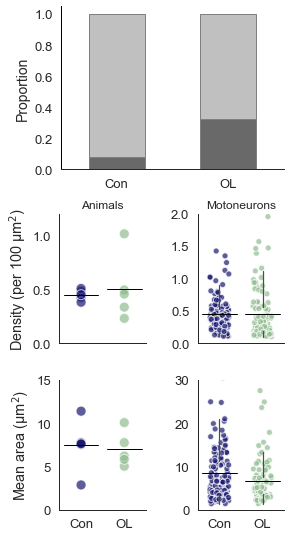

In [240]:
df1 = prop_df2.pivot(columns='SK3_Expression',index='Condition').fillna(0)
#plot it


plt1c=df1.plot(figsize=(4,3),kind='bar',stacked=True,legend=False, color=('dimgrey','silver'), linewidth=1,edgecolor='grey')
ax = plt.gca()
fig_Aes('white',('Con','OL'),'Proportion',13,14,'','horizontal')
Axes_settings(1,'black',0)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
#legend_settings('dimgrey','silver')
degrees = 0
plt.xticks(rotation=degrees)
#plt1c.legend(custom_lines, ['SK3 -', 'SK3 +'],frameon=False, loc=1,bbox_to_anchor=(1.3, 0.1, 0, 1),fontsize=12)

labels1=['','']
two_cond_stripplot1(1,0.12,-0.68, 0.3, 0.6,'Condition','SK3_density',10,None,0.7,1,'darkseagreen','midnightblue',SK3_1_clean_grouped,0,'white',0,1.2,'Density (per 100 \u03BCm$^2$)','','Animals',12,1,False)

two_cond_stripplot2(2,0.6,-0.68, 0.3, 0.6,'Condition','SK3_density',6,None,0.7,1,'darkseagreen','midnightblue',SK3_1_clean3,0.22,'white',0,2,'','','Motoneurons',12,1,False)

labels1=['OL','Con']
two_cond_stripplot1(3,0.12,-1.45, 0.3, 0.6,'Condition','SK3_Area',10,None,0.7,1,'darkseagreen','midnightblue',SK3_1_clean_grouped,0,'white',0,15,'Mean area (\u03BCm$^2$)','','',12,1,False)

two_cond_stripplot2(4,0.6,-1.45, 0.3, 0.6,'Condition','SK3_Area',6,None,0.7,1,'darkseagreen','midnightblue',SK3_1_clean3,0.22,'white',0,30,'','','',12,1,False)


plt.savefig(r'C:\Users\csmith\OneDrive - University College London\Overload\SK3_21.png', dpi= 300, bbox_inches = 'tight')


 ## SK3 Stats

In [220]:
# assessing the proportions for control
rp.summary_cont(SK3_1_con.groupby("SK3_Expression")['SK3_density'])



,N,Mean,SD,SE,95% Conf.,Interval
SK3_Expression,,,,,,
neg,11,0.053962,0.027707,0.008354,0.036789,0.071136
pos,130,0.450196,0.345110,0.030268,0.390641,0.509751


In [221]:
#assessing proportions for OL
rp.summary_cont(SK3_1_ol.groupby("SK3_Expression")['SK3_density'])



,N,Mean,SD,SE,95% Conf.,Interval
SK3_Expression,,,,,,
neg,47,0.052486,0.026628,0.003884,0.044790,0.060181
pos,97,0.450124,0.420517,0.042697,0.366003,0.534245


In [225]:
rp.summary_cont(SK3_1.groupby("SK3_Expression")['SK3_density'])

,N,Mean,SD,SE,95% Conf.,Interval
SK3_Expression,,,,,,
neg,58,0.052766,0.026594,0.003492,0.045862,0.059670
pos,227,0.450165,0.378283,0.025108,0.400846,0.499485


## There is a significant difference between the proportions of SK3 positive to negative cells in control vs overload. 



In [684]:
#performing 2 proportion z test
from statsmodels.stats.proportion import proportions_ztest
count= np.array([47,11])
nobs=np.array([141,144])
stat, pval = proportions_ztest(count, nobs)
print('{0:0.10f}'.format(pval))



0.0000000717


In [230]:
rp.summary_cont(SK3_1_clean_grouped.groupby("Condition")['SK3_Area'])


,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,7.469389,2.715855,1.108743,5.088838,9.849941
OVERLOAD,5,6.959183,1.998020,0.893542,5.001124,8.917242


In [229]:
rp.summary_cont(SK3_1_clean_grouped.groupby("Condition")['SK3_density'])

,N,Mean,SD,SE,95% Conf.,Interval
Condition,,,,,,
CONTROL,6,0.447105,0.044192,0.018042,0.408369,0.485842
OVERLOAD,5,0.504676,0.302319,0.135201,0.208403,0.800949


 ### SK3 Density tests

 ### SK3 Density Whole EDL control vs OL

In [231]:
#Shap_normality(SK3_1_clean_grouped_OUTLIER,'SK3_density','Control vs OL for SK3_density')
Shap_normality(SK3_1_clean_grouped,'SK3_Area','Control vs OL for SK3_Area')



Control vs OL for SK3_Area
Size=0.949, p=0.626
normally distributed:use parametric


In [232]:
#SK3 Density
DF=SK3_1_clean_grouped.drop(SK3_1_clean_grouped[SK3_1_clean_grouped['Condition']=='OVERLOAD'].index)
DF1=SK3_1_clean_grouped.drop(SK3_1_clean_grouped[SK3_1_clean_grouped['Condition']=='CONTROL'].index)
T_Test(DF.SK3_density,DF1.SK3_density,'Control','Overload','SK3_density','Entire EDL')

#SK3 Area
DF=SK3_1_clean_grouped.drop(SK3_1_clean_grouped[SK3_1_clean_grouped['Condition']=='OVERLOAD'].index)
DF1=SK3_1_clean_grouped.drop(SK3_1_clean_grouped[SK3_1_clean_grouped['Condition']=='CONTROL'].index)
T_Test(DF.SK3_Area,DF1.SK3_Area,'Control','Overload','SK3 Area','Entire EDL')



T test: Control vs Overload for SK3_density
Statistics=-0.466, p=0.652595307261806
SK3_density has the same distribution between Control and Overload in Entire EDL(fail to reject H0)
T test: Control vs Overload for SK3 Area
Statistics=0.348, p=0.736050870994032
SK3 Area has the same distribution between Control and Overload in Entire EDL(fail to reject H0)
